## 0.0 Requirements 

In [287]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding

In [288]:
data = pd.read_csv(r'ecommerce_dataset.csv')
data.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27
3,ORD1003,CUST154,Other,18,Books,Blender,3,48.38,2023-08-06,Port Elizabeth,Credit Card,Pending,5,145.14
4,ORD1004,CUST172,Male,22,Beauty,Shirt,1,468.79,2023-07-09,Port Elizabeth,Credit Card,Pending,2,468.79


In [289]:
data.columns

Index(['OrderID', 'CustomerID', 'Gender', 'Age', 'ProductCategory',
       'ProductName', 'Quantity', 'PricePerUnit', 'OrderDate', 'City',
       'PaymentMethod', 'DeliveryStatus', 'CustomerRating', 'TotalPrice'],
      dtype='object')

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          500 non-null    object 
 1   CustomerID       500 non-null    object 
 2   Gender           500 non-null    object 
 3   Age              500 non-null    int64  
 4   ProductCategory  500 non-null    object 
 5   ProductName      500 non-null    object 
 6   Quantity         500 non-null    int64  
 7   PricePerUnit     500 non-null    float64
 8   OrderDate        500 non-null    object 
 9   City             500 non-null    object 
 10  PaymentMethod    500 non-null    object 
 11  DeliveryStatus   500 non-null    object 
 12  CustomerRating   500 non-null    int64  
 13  TotalPrice       500 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 54.8+ KB


In [291]:
data.describe()

,Age,Quantity,PricePerUnit,CustomerRating,TotalPrice
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,43.582000,2.468000,253.710940,2.964000,622.799280
std,14.979722,1.134703,143.300391,1.429262,494.880821
min,18.000000,1.000000,6.590000,1.000000,11.240000
25%,30.750000,1.000000,129.055000,2.000000,249.622500
50%,43.000000,2.000000,255.470000,3.000000,453.645000
75%,56.000000,4.000000,381.707500,4.000000,889.200000
max,69.000000,4.000000,499.180000,5.000000,1989.840000


In [292]:
age_bins = [0, 18, 25, 35, 60, 100]
age_labels = ['Child (0-18)', 'Young Adult (18-25)', 'Adult (25-36)', 'Middle Aged (35-60)', 'Senior (60+)']

# Create the 'AgeGroup' column using pd.cut()
data['Age Group'] = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=True)

In [293]:
data.columns

Index(['OrderID', 'CustomerID', 'Gender', 'Age', 'ProductCategory',
       'ProductName', 'Quantity', 'PricePerUnit', 'OrderDate', 'City',
       'PaymentMethod', 'DeliveryStatus', 'CustomerRating', 'TotalPrice',
       'Age Group'],
      dtype='object')

In [294]:
data['Age Group'].head()

0          Adult (25-36)
1    Middle Aged (35-60)
2    Middle Aged (35-60)
3           Child (0-18)
4    Young Adult (18-25)
Name: Age Group, dtype: category
Categories (5, object): ['Child (0-18)' < 'Young Adult (18-25)' < 'Adult (25-36)' < 'Middle Aged (35-60)' < 'Senior (60+)']

## 1. Monthly Revenue Trend Analysis

### 1.1 Extract month from OrderDate.


In [295]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%Y-%m-%d')
data['Month'] = data['OrderDate'].dt.strftime('%B')

In [296]:
data['Month'].head()

0      October
1         June
2    September
3       August
4         July
Name: Month, dtype: object

### 1.2 Calculate total revenue per month.


The total revenue that we have calculated is based on the deliveries that were aactually delivered.

In [297]:
def get_rows_by_column_value(df, column_name, target_value):

  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in the DataFrame.")
    return pd.DataFrame()  # Return an empty DataFrame

  matching_rows = df[df[column_name] == target_value]
  return matching_rows


delivered = get_rows_by_column_value(data, 'DeliveryStatus', 'Delivered')
print("Rows where Delivery Status is Deliverd:")
print(delivered)


Rows where Delivery Status is Deliverd:
     OrderID CustomerID  Gender  Age ProductCategory ProductName  Quantity  \
0    ORD1000    CUST160   Other   27        Clothing     Perfume         4   
1    ORD1001    CUST120    Male   36        Clothing      Puzzle         4   
2    ORD1002    CUST172   Other   49           Books        Doll         1   
5    ORD1005    CUST110    Male   62            Toys       Shirt         3   
6    ORD1006    CUST176   Other   21          Beauty      Laptop         1   
..       ...        ...     ...  ...             ...         ...       ...   
475  ORD1475    CUST164    Male   30     Electronics       Phone         4   
482  ORD1482    CUST150  Female   62           Books       Phone         1   
484  ORD1484    CUST141    Male   64            Toys     Perfume         2   
485  ORD1485    CUST157  Female   53           Books       Pants         2   
488  ORD1488    CUST141   Other   51        Clothing       Shirt         3   

     PricePerUnit  Orde

In [298]:
pd.DataFrame(delivered)

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice,Age Group,Month
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20,Adult (25-36),October
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96,Middle Aged (35-60),June
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27,Middle Aged (35-60),September
5,ORD1005,CUST110,Male,62,Toys,Shirt,3,279.13,2023-06-12,Cape Town,Cash,Delivered,3,837.39,Senior (60+),June
6,ORD1006,CUST176,Other,21,Beauty,Laptop,1,156.23,2023-06-29,Port Elizabeth,Credit Card,Delivered,4,156.23,Young Adult (18-25),June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,ORD1475,CUST164,Male,30,Electronics,Phone,4,319.16,2023-03-16,Port Elizabeth,Cash,Delivered,5,1276.64,Adult (25-36),March
482,ORD1482,CUST150,Female,62,Books,Phone,1,266.06,2023-08-07,Cape Town,Cash,Delivered,2,266.06,Senior (60+),August
484,ORD1484,CUST141,Male,64,Toys,Perfume,2,445.68,2023-04-02,Port Elizabeth,PayPal,Delivered,3,891.36,Senior (60+),April
485,ORD1485,CUST157,Female,53,Books,Pants,2,44.31,2023-06-24,Johannesburg,Debit Card,Delivered,3,88.62,Middle Aged (35-60),June


In [299]:
#Unordered calender months
tot_revenue = delivered.groupby('Month')['TotalPrice'].sum()
tot_revenue

Month
April        7783.70
August        997.13
December     6364.68
February     9679.64
January      5943.84
July         4329.44
June         7871.34
March        8206.44
May          4175.16
November     6821.04
October      2823.81
September    2904.77
Name: TotalPrice, dtype: float64

In [300]:
#ordered calender months.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
tot_revenue = tot_revenue.reindex(month_order)
tot_revenue

Month
January      5943.84
February     9679.64
March        8206.44
April        7783.70
May          4175.16
June         7871.34
July         4329.44
August        997.13
September    2904.77
October      2823.81
November     6821.04
December     6364.68
Name: TotalPrice, dtype: float64

### 1.3 Plot a line graph showing revenue trend.



Text(0.5, 0, 'Month')

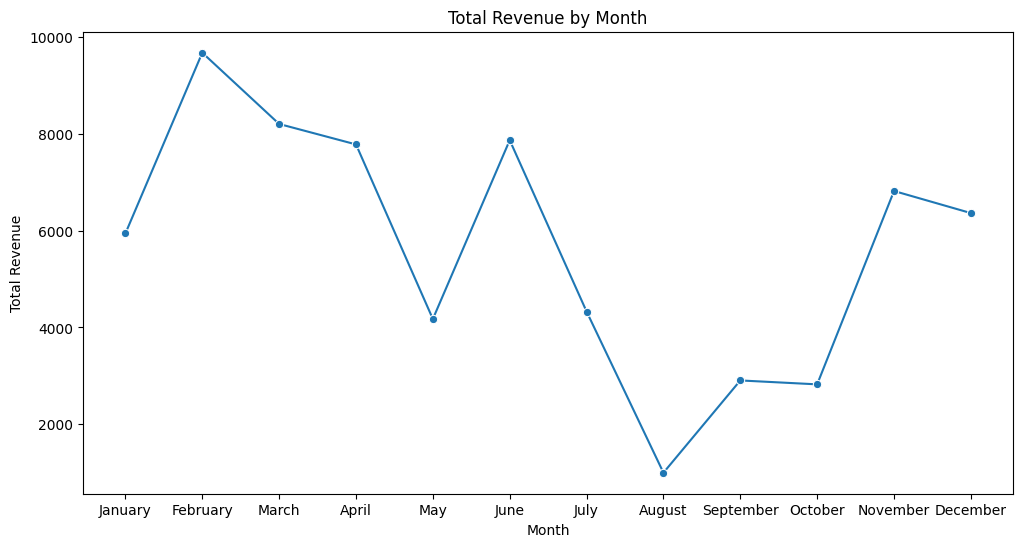

In [301]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=tot_revenue.index, y=tot_revenue.values, palette='viridis', marker='o')
plt.title('Total Revenue by Month')
plt.ylabel('Total Revenue') 
plt.xlabel('Month')


### 1.4 Identify the month with the highest total sales.

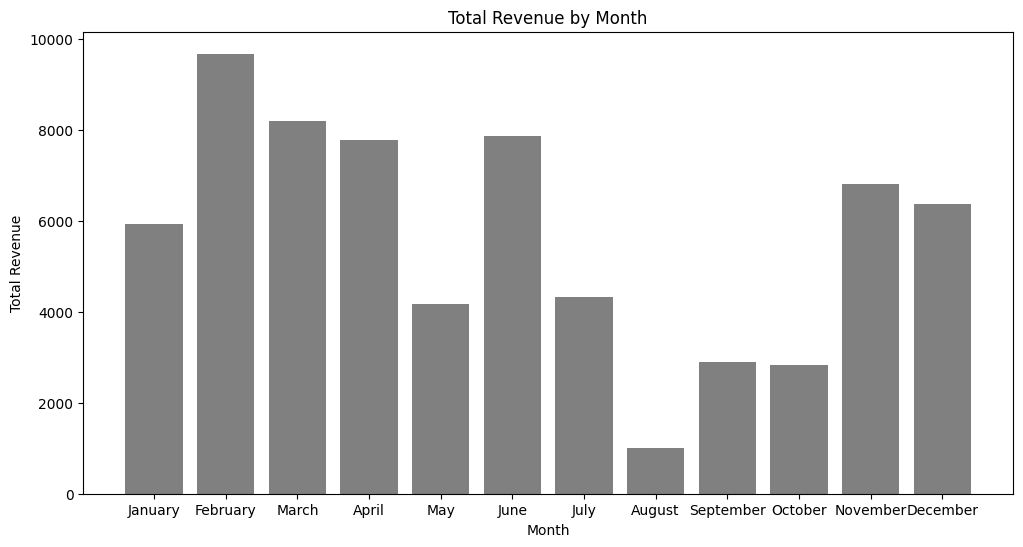

In [302]:
plt.figure(figsize=(12, 6))
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.bar(tot_revenue.index, tot_revenue.values, color='grey')
plt.show()

In [303]:
print('The month with the highest revenue is', tot_revenue.idxmax(), 'with a total revenue of', tot_revenue.max())

The month with the highest revenue is February with a total revenue of 9679.64


## 2. Product Category vs. Ratings and Revenue

### 2.1 Find average customer rating and total revenue per ProductCategory.


In [304]:
#Average Customer Rating by Product Category
average_rating = delivered.groupby('ProductCategory')['CustomerRating'].mean()
average_rating

ProductCategory
Beauty         3.263158
Books          3.478261
Clothing       2.368421
Electronics    2.941176
Home           2.529412
Toys           2.909091
Name: CustomerRating, dtype: float64

In [305]:
#Total Revenue by Product Category
total_rev_pc = delivered.groupby('ProductCategory')['TotalPrice'].sum()
total_rev_pc

ProductCategory
Beauty         18056.78
Books          13196.38
Clothing       10427.93
Electronics     9697.54
Home            9911.01
Toys            6611.35
Name: TotalPrice, dtype: float64

### 2.2 Display findings using bar plots or a side-by-side visualization.


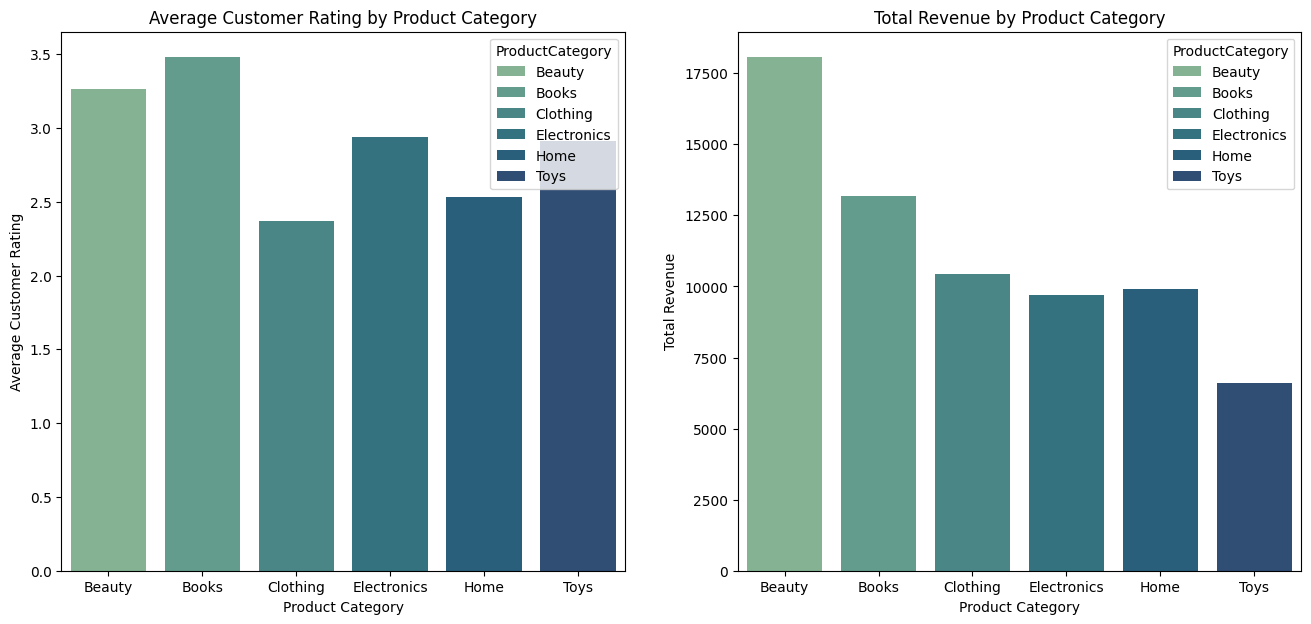

In [306]:
# Using axes for different plot types within the same figure
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns

# Line plot on the first axis
sns.barplot(x=average_rating.index, y=average_rating.values, palette='crest',hue=average_rating.index, legend=True, ax=axes[0])
axes[0].set_title('Average Customer Rating by Product Category')
axes[0].set_ylabel('Average Customer Rating')
axes[0].set_xlabel('Product Category')


# Bar plot on the second axis (using aggregated data)
sns.barplot(x=total_rev_pc.index, y=total_rev_pc.values, palette='crest',hue=total_rev_pc.index, legend=True, ax=axes[1])
axes[1].set_title('Total Revenue by Product Category')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xlabel('Product Category')
plt.show()

### 2.3 Comment on whether the highest-rated category also earns the most revenue.

Observing the above side-by-side bar charts we can realise that the books category has the highest average rating but will less total revenue generated. The toys category has a lower average rating than the Books category but has the highest total revenue generated above all the catrgories. 

## 3. Payment Method Analysis


### 3.1 Determine the most commonly used payment method.


In [307]:
most_used_pm = data.groupby('PaymentMethod')['PaymentMethod'].count()
print('The most used payment method is', most_used_pm.idxmax(), 'with a total of', most_used_pm.max(), 'transactions')

The most used payment method is Credit Card with a total of 123 transactions


### 3.2 Identify the method with the highest total revenue.


In [308]:
most_revenue_pm = delivered.groupby('PaymentMethod')['TotalPrice'].sum()
print('The payment method with the highest revenue is', most_revenue_pm.idxmax(), 'with a total revenue of', most_revenue_pm.max())

The payment method with the highest revenue is Credit Card with a total revenue of 17911.19


### 3.3 Display results using count plot and bar chart.

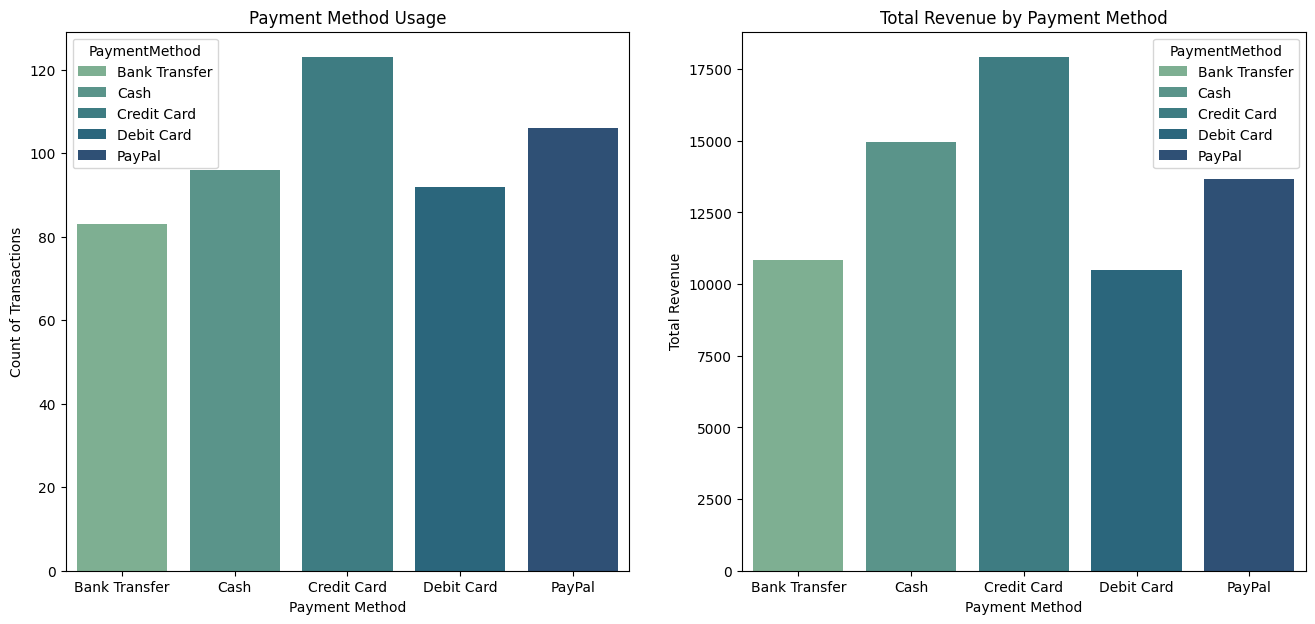

In [309]:
# Using axes for different plot types within the same figure
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns

# Line plot on the first axis
sns.barplot(x=most_used_pm.index, y=most_used_pm.values, palette='crest',hue=most_used_pm.index, legend=True, ax=axes[0])
axes[0].set_title('Payment Method Usage')
axes[0].set_ylabel('Count of Transactions')
axes[0].set_xlabel('Payment Method')


# Bar plot on the second axis (using aggregated data)
sns.barplot(x=most_revenue_pm.index, y=most_revenue_pm.values, palette='crest',hue=most_revenue_pm.index, legend=True, ax=axes[1])
axes[1].set_title('Total Revenue by Payment Method')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xlabel('Payment Method')
plt.show()

## 4. City-Based Sales & Order Value

### 4.1 Grouped data by City.


In [310]:
city_Rev = data.groupby('City')


### 4.2 Total sales.


From my understanding we have to get the total sales from the approved transactions, that is those which were delivered.

In [311]:
delivery_counts = data['DeliveryStatus'].value_counts()
delivery_counts

DeliveryStatus
Cancelled    139
Returned     131
Pending      124
Delivered    106
Name: count, dtype: int64

In [312]:
city_delivery = data.groupby('City')['DeliveryStatus'].value_counts()
city_delivery

City            DeliveryStatus
Cape Town       Cancelled         34
                Pending           27
                Delivered         21
                Returned          17
Durban          Returned          27
                Delivered         24
                Cancelled         22
                Pending           22
Johannesburg    Returned          30
                Pending           26
                Cancelled         25
                Delivered         18
Port Elizabeth  Cancelled         32
                Delivered         25
                Returned          25
                Pending           21
Pretoria        Returned          32
                Pending           28
                Cancelled         26
                Delivered         18
Name: count, dtype: int64

In [313]:
(data['DeliveryStatus'] == 'Delivered').value_counts()

DeliveryStatus
False    394
True     106
Name: count, dtype: int64

The total sales that were made are 106.

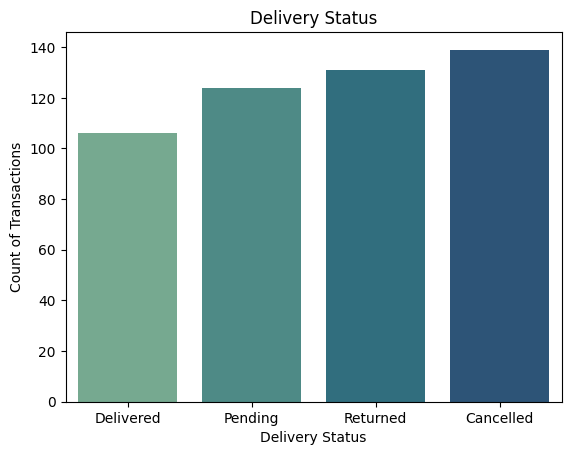

In [314]:
sns.countplot(x='DeliveryStatus',hue='DeliveryStatus', data=data, palette='crest')
plt.title('Delivery Status')
plt.ylabel('Count of Transactions')
plt.xlabel('Delivery Status')
plt.show()

### 4.3 Average order value across Cities.

In [315]:
average_order = data.groupby('City')['TotalPrice'].mean()
print('The city with the highest average order value is', average_order.idxmax(), 'with an average order value of', round(average_order.max(),2))

The city with the highest average order value is Johannesburg with an average order value of 668.91


### 4.4 Identify and visualize the top 3 cities by total sales.

In [316]:
data.columns

Index(['OrderID', 'CustomerID', 'Gender', 'Age', 'ProductCategory',
       'ProductName', 'Quantity', 'PricePerUnit', 'OrderDate', 'City',
       'PaymentMethod', 'DeliveryStatus', 'CustomerRating', 'TotalPrice',
       'Age Group', 'Month'],
      dtype='object')

In [317]:
city_tot_sales = delivered.groupby('City')['DeliveryStatus'].count()
city_tot_sales


City
Cape Town         21
Durban            24
Johannesburg      18
Port Elizabeth    25
Pretoria          18
Name: DeliveryStatus, dtype: int64

In [318]:
print("The total city sales are:", city_tot_sales.sum())

The total city sales are: 106


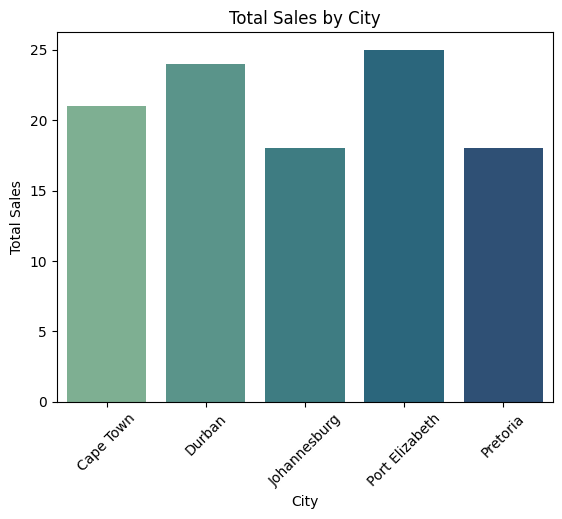

In [319]:
sns.barplot(x=city_tot_sales.index, y=city_tot_sales.values, palette='crest')
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


## 5. Gender & Product Category Ratings Comparison

### 5.1 Analyze if average ratings vary across gender and product category.

In [320]:
gender_avg_rating = data.groupby('Gender')['CustomerRating'].mean()
gender_avg_rating

Gender
Female    2.928144
Male      2.970238
Other     2.993939
Name: CustomerRating, dtype: float64

In [321]:
prod_cat_avg_rating = data.groupby('ProductCategory')['CustomerRating'].mean()
prod_cat_avg_rating

ProductCategory
Beauty         3.012048
Books          3.284091
Clothing       2.807692
Electronics    2.709302
Home           3.027778
Toys           2.935484
Name: CustomerRating, dtype: float64

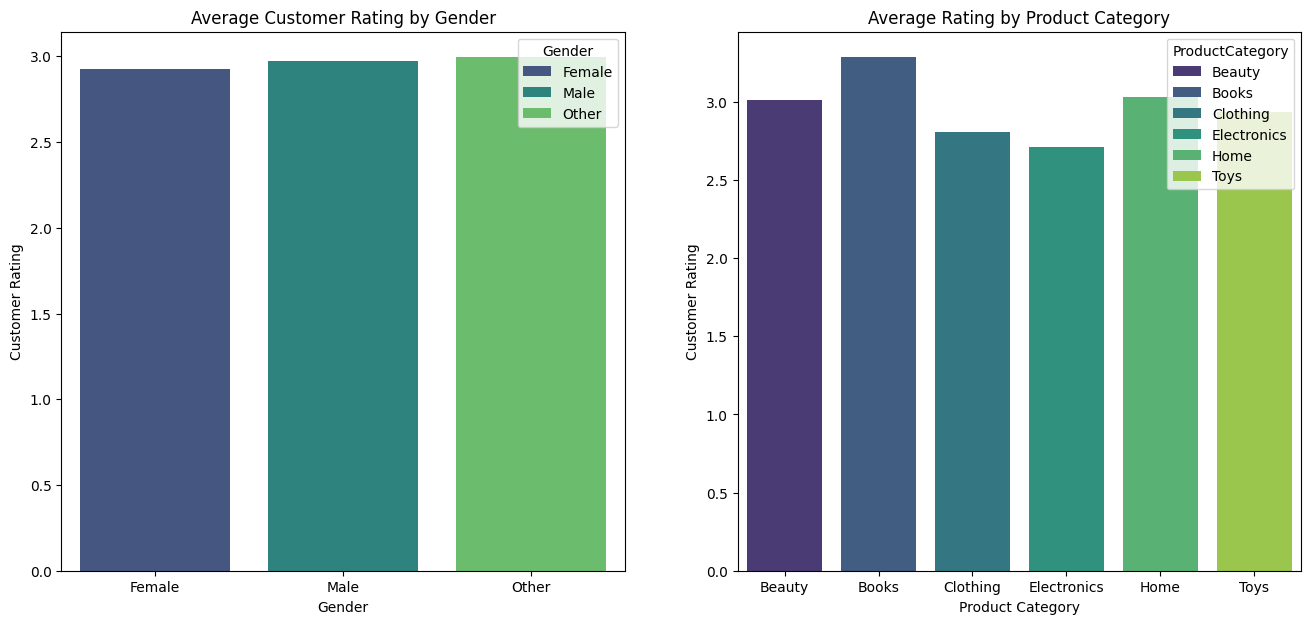

In [322]:
# Using axes for different plot types within the same figure
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns

# Line plot on the first axis
sns.barplot(x=gender_avg_rating.index, y=gender_avg_rating.values, palette='viridis', hue=gender_avg_rating.index, legend=True, ax=axes[0])
axes[0].set_title('Average Customer Rating by Gender')
axes[0].set_ylabel('Customer Rating')
axes[0].set_xlabel('Gender')


# Bar plot on the second axis (using aggregated data)
sns.barplot(x=prod_cat_avg_rating.index, y=prod_cat_avg_rating.values, palette='viridis', hue=prod_cat_avg_rating.index, legend=True, ax=axes[1])
axes[1].set_title('Average Rating by Product Category')
axes[1].set_ylabel('Customer Rating')
axes[1].set_xlabel('Product Category')
plt.show()

### 5.2 Use heatmap or grouped bar chart to visualize.

In [323]:
grouped_data = data.groupby(['Gender', 'ProductCategory'])['CustomerRating'].mean().unstack()
grouped_data

ProductCategory,Beauty,Books,Clothing,Electronics,Home,Toys
Gender,,,,,,
Female,3.281250,2.933333,2.518519,2.730769,3.150000,2.937500
Male,2.750000,3.515152,2.916667,2.689655,2.791667,3.033333
Other,2.956522,3.400000,3.000000,2.709677,3.142857,2.838710


In [324]:
grouped_data.corr()

ProductCategory,Beauty,Books,Clothing,Electronics,Home,Toys
ProductCategory,,,,,,
Beauty,1.000000,-0.978476,-0.848065,0.993651,0.805707,-0.377470
Books,-0.978476,1.000000,0.939160,-0.949046,-0.666134,0.178250
Clothing,-0.848065,0.939160,1.000000,-0.783063,-0.369429,-0.170573
Electronics,0.993651,-0.949046,-0.783063,1.000000,0.867231,-0.479258
Home,0.805707,-0.666134,-0.369429,0.867231,1.000000,-0.852626
Toys,-0.377470,0.178250,-0.170573,-0.479258,-0.852626,1.000000


<Axes: xlabel='ProductCategory', ylabel='Gender'>

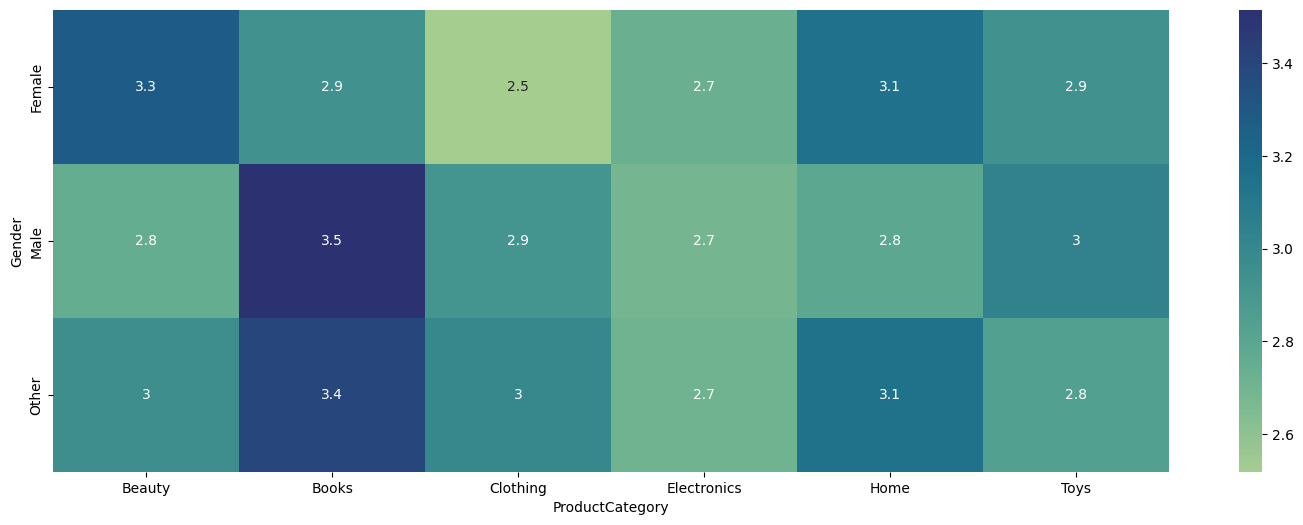

In [325]:
plt.figure(figsize=(18, 6))  
sns.heatmap(grouped_data, annot=True, cmap='crest')

### 5.3 Briefly interpret the outcome.

The outcome gives a realization that female only buys beauty and home items the most and male and other are considered to be the bigger buyers on books and clothes.

## !!! Age Group Analysis

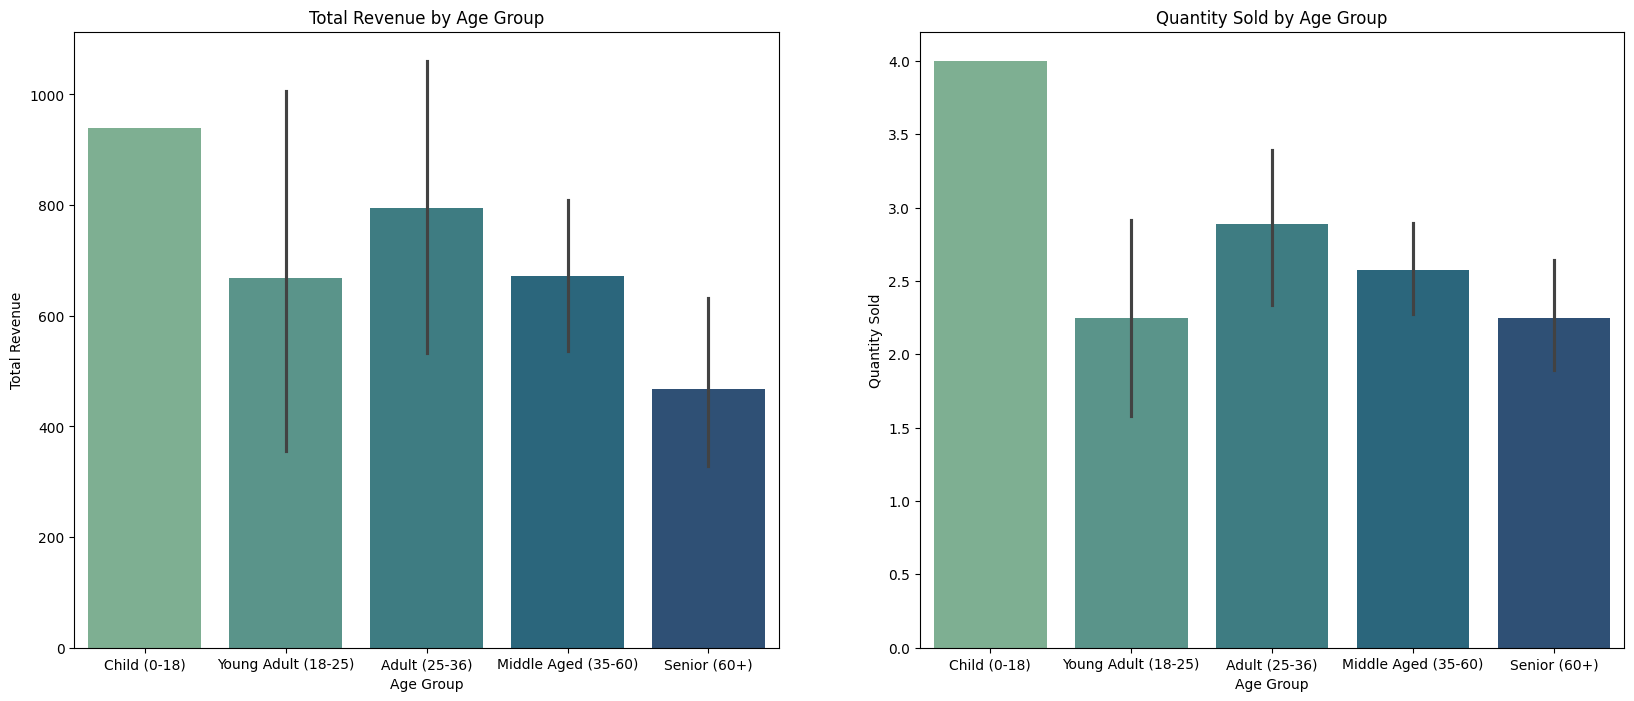

In [326]:
# Using axes for different plot types within the same figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # 1 row, 2 columns

sns.barplot(x=delivered['Age Group'], y=delivered['TotalPrice'], palette='crest',hue=delivered['Age Group'], legend=False, ax=axes[0])
axes[0].set_title('Total Revenue by Age Group')
axes[0].set_ylabel('Total Revenue')
axes[0].set_xlabel('Age Group')

sns.barplot(x=delivered['Age Group'], y=delivered['Quantity'], palette='crest',hue=delivered['Age Group'], legend=False, ax=axes[1])
axes[1].set_title('Quantity Sold by Age Group')
axes[1].set_ylabel('Quantity Sold')
axes[1].set_xlabel('Age Group')

plt.tight_layout
plt.show()

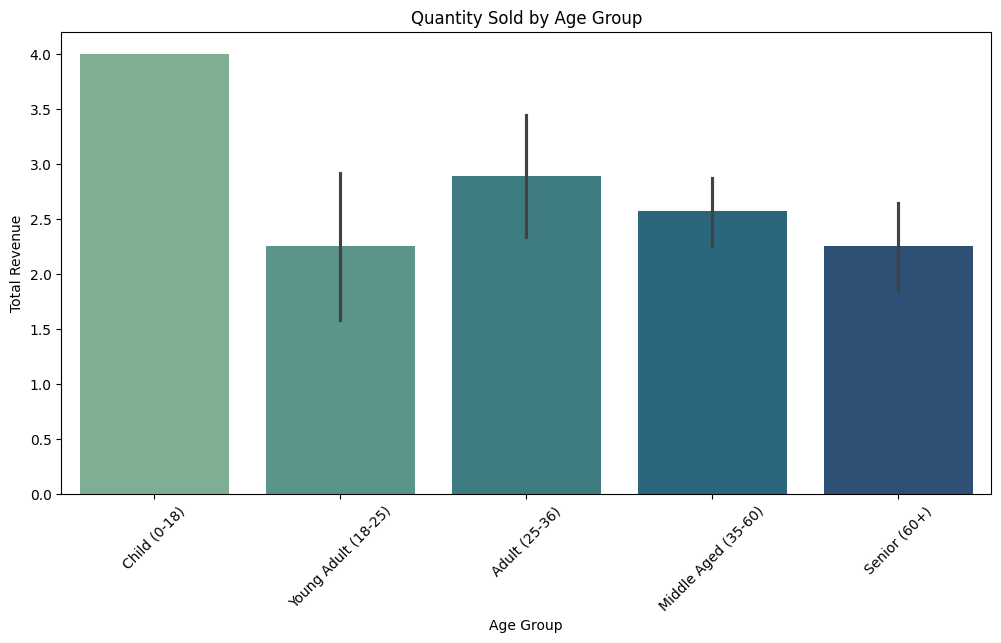

In [327]:
plt.figure(figsize=(12, 6))
sns.barplot(x=delivered['Age Group'], y=delivered['Quantity'], palette='crest')
plt.title('Quantity Sold by Age Group')
plt.ylabel('Total Revenue')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

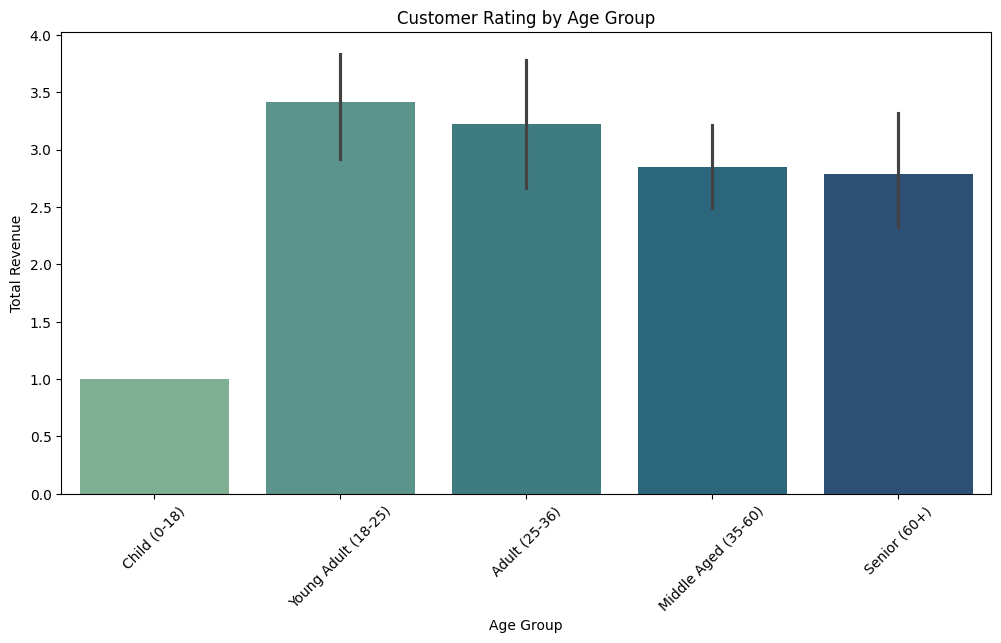

In [328]:
plt.figure(figsize=(12, 6))
sns.barplot(x=delivered['Age Group'], y=delivered['CustomerRating'], palette='crest')
plt.title('Customer Rating by Age Group')
plt.ylabel('Total Revenue')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

In [329]:
age_grouped_data = data.groupby(['Age Group', 'ProductCategory'])['CustomerRating'].mean().unstack()
age_grouped_data

ProductCategory,Beauty,Books,Clothing,Electronics,Home,Toys
Age Group,,,,,,
Child (0-18),5.000000,3.000000,2.333333,3.500000,3.000000,4.000000
Young Adult (18-25),2.666667,2.750000,2.916667,2.833333,3.000000,2.733333
Adult (25-36),2.764706,3.909091,2.571429,2.904762,2.941176,3.150000
Middle Aged (35-60),3.097561,3.180000,3.026316,2.564103,3.205882,2.969697
Senior (60+),3.133333,3.692308,2.363636,2.666667,2.666667,2.791667


<Axes: xlabel='ProductCategory', ylabel='Age Group'>

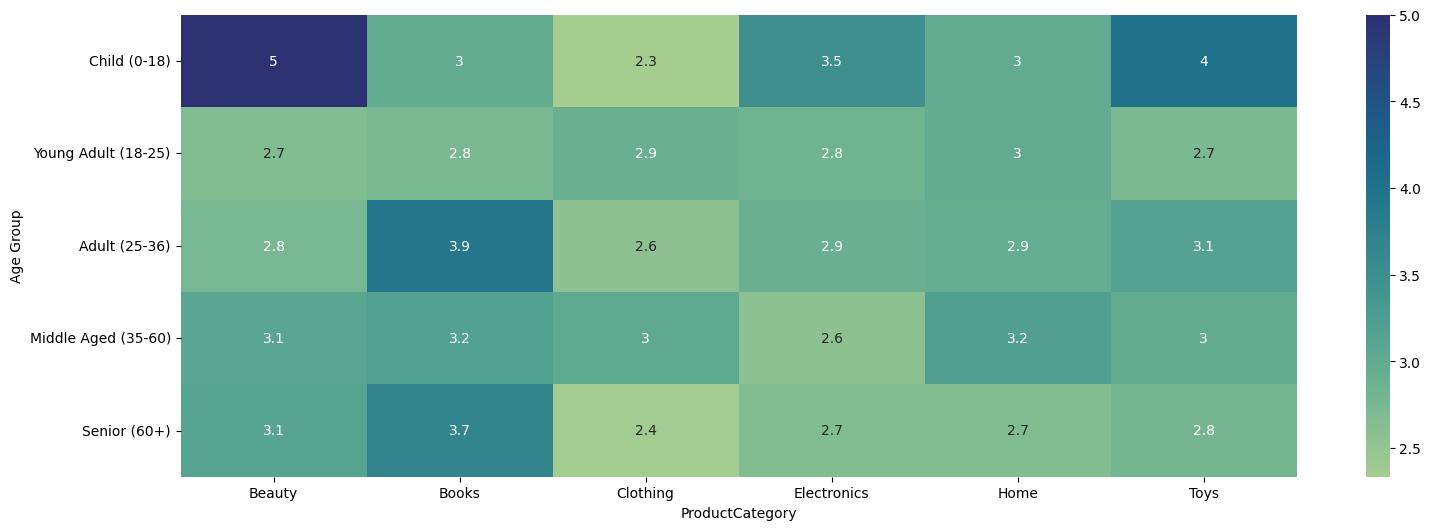

In [330]:
plt.figure(figsize=(18, 6))  
sns.heatmap(age_grouped_data, annot=True, cmap='crest')